Dans ce notebook, il s'agit d'étudier de faire une analyse descriptive poussée des données afin de sortir des informations pertinentes sur l'interprétation des résultats de cette campagne marketing.

#  Visualisation des données 

#### Import de librairies et chargement des données 

In [303]:
import pandas as pd
import numpy as np

#Import de la librairie matplotlib qui va permettre de faire 
import matplotlib.pyplot as plt
#Seaborn est une alternative de matplotlib 
import seaborn as sns

pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 400)

In [304]:
df = pd.read_csv("bank-full.csv",  sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Etude préalable des données 

In [305]:
print(np.shape(df))

(45211, 17)


In [582]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [306]:
#Pas de valeurs manquantes observées 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [307]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [308]:
#On affiche le nombre de modalités différentes par variable
for col in df.columns:
    print(col, len(df[col].unique()))

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


## 1. Etude unidimensionnelle

### 1.1 Analyse des variables numériques

#### Répartition des âges

In [309]:
#On observe une distribution des âges allant de 18 à 95 ans, avec une moyenne de 41 ans pour une médiane de 39 ans. 
df["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [310]:
#On sépare la variable âge en décennie
df["age_class"] = pd.cut(df["age"],[10*i for i in range(11)])
df.age_class.value_counts().sort_index()

(0, 10]          0
(10, 20]        97
(20, 30]      6933
(30, 40]     17687
(40, 50]     11239
(50, 60]      8067
(60, 70]       701
(70, 80]       388
(80, 90]        92
(90, 100]        7
Name: age_class, dtype: int64

In [311]:
#On affiche le pourcentage de personnes appelées dans chaque décennie 
df.age_class.value_counts().sort_index().apply(lambda x: x/len(df))

(0, 10]      0.000000
(10, 20]     0.002145
(20, 30]     0.153348
(30, 40]     0.391210
(40, 50]     0.248590
(50, 60]     0.178430
(60, 70]     0.015505
(70, 80]     0.008582
(80, 90]     0.002035
(90, 100]    0.000155
Name: age_class, dtype: float64

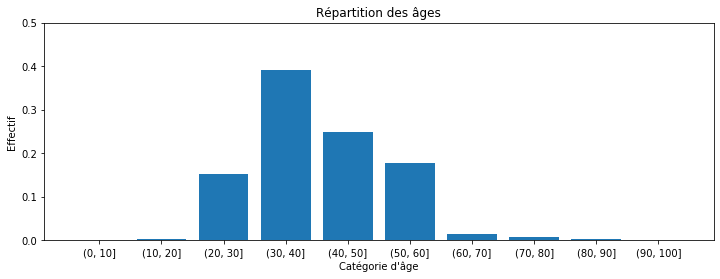

In [312]:
fig, ax1 = plt.subplots(1,1,figsize=(12,4))

ax1.bar([str(i) for i in df.age_class.value_counts().sort_index().index], df.age_class.value_counts().sort_index().apply(lambda x: x/len(df)))

ax1.set_xlabel("Catégorie d'âge")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des âges")
ax1.set_ylim(0,0.5)
plt.show()

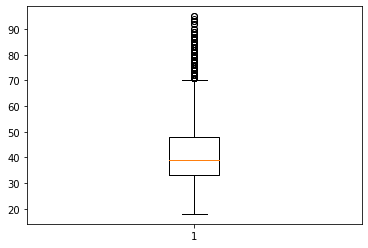

In [313]:
#On peut aussi avoir la répartition de l'âge sur un boxplot mais je trouve ça moins visuel.
plt.boxplot(df["age"])
plt.show()

#### Analyse de duration

In [314]:
#En moyenne, les gens sont restés un peu plus de 4 min au téléphone 
#même si 50% d'entre eux ont raccroché avant que la durée du call n'atteigne 3min
#Le call le plus long a duré 1h20
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

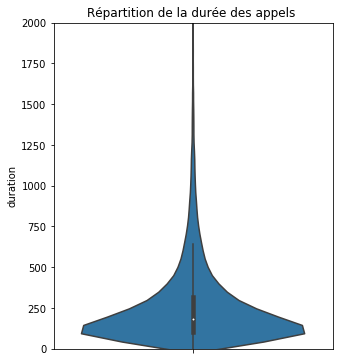

In [315]:
fig, ax1 = plt.subplots(1,1,figsize=(5,6))


sns.violinplot(y = "duration", data = df)


ax1.set_title("Répartition de la durée des appels ")
ax1.set_ylim(0,2000)
plt.show()

#### Analyse de pdays

Il s'agit du nombre de jours qui sont passés depuis que le client ait été contacté pour une ancienne campagne (-1 siginfie que le client n'a pas été contacté précédemment)

Peut-être à comparer avec poutcome

In [581]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [577]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [579]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

### 1.2 Analyse des variables catégorielles

#### Répartition des emplois

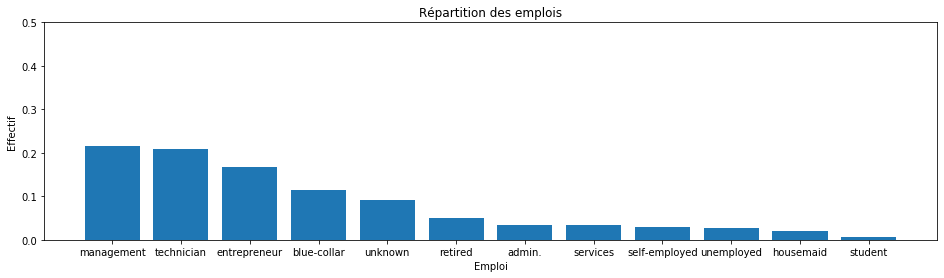

In [98]:
fig, ax1 = plt.subplots(1,1,figsize=(16,4))

ax1.bar(df.job.unique(), df.job.value_counts().apply(lambda x: x/len(df)))

ax1.set_xlabel("Emploi")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des emplois")
ax1.set_ylim(0,0.5)
plt.show()

#### Répartition des statuts maritaux

In [99]:
#60% des personnes contactées sont mariées 
df.marital.value_counts().apply(lambda x: x/len(df))

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

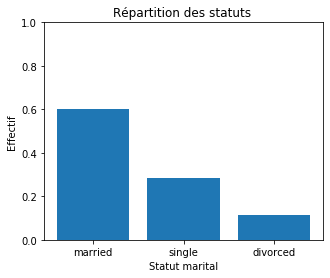

In [100]:
fig, ax1 = plt.subplots(1,1,figsize=(5,4))

ax1.bar(df.marital.unique(), df.marital.value_counts().apply(lambda x: x/len(df)))

ax1.set_xlabel("Statut marital")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des statuts ")
ax1.set_ylim(0,1)
plt.show()

#### Répartition des types d'etudes 

In [101]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

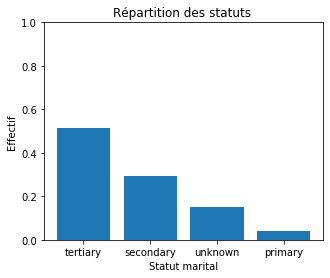

In [102]:
fig, ax1 = plt.subplots(1,1,figsize=(5,4))

ax1.bar(df.education.unique(), df.education.value_counts().apply(lambda x: x/len(df)))

ax1.set_xlabel("Statut marital")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des statuts ")
ax1.set_ylim(0,1)
plt.show()

#### Analyse de la temporalité

In [104]:
#On ne connait les années associées à ces mois donc il est difficile de tirer des conclusions de l'analyse de la répartition des appels par mois
dic_month = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
dic_month.keys()

dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

In [105]:
df.month.apply(lambda x: dic_month[x]).value_counts().sort_index()

1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: month, dtype: int64

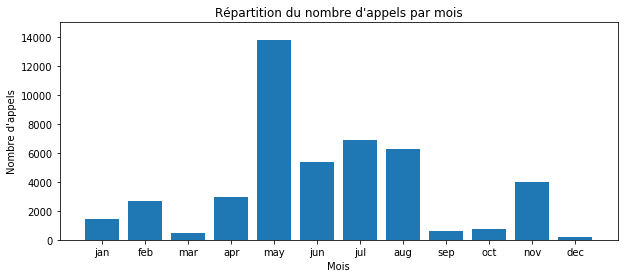

In [106]:
fig, ax1 = plt.subplots(1,1,figsize=(10,4))

ax1.bar(dic_month.keys(), df.month.apply(lambda x: dic_month[x]).value_counts().sort_index())

ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre d'appels")
ax1.set_title("Répartition du nombre d'appels par mois")
ax1.set_ylim(0,15000)
plt.show()

In [117]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

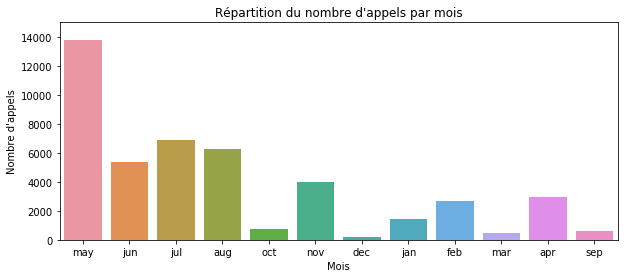

In [379]:
#Alternative via Seaborn
fig, ax1 = plt.subplots(1,1,figsize=(10,4))

ax1 = sns.countplot(x = "month", data = df)

ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre d'appels")
ax1.set_title("Répartition du nombre d'appels par mois")
ax1.set_ylim(0,15000)
plt.show()

#### Analyse du solde

In [417]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

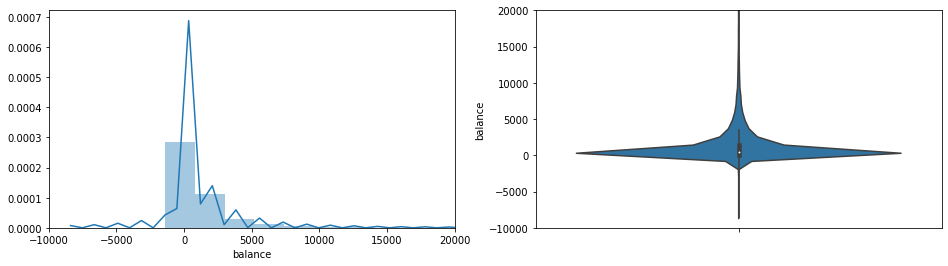

In [416]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
sns.distplot(df.balance, ax = ax1)
ax1.set_xlim(-10000,20000)
sns.violinplot(y = "balance", data = df, ax = ax2)
ax2.set_ylim(-10000, 20000)
plt.show()

#### Analyse du taux de souscription

In [177]:
print("Le taux de souscription moyen est de", round(100*df.y.value_counts().apply(lambda x: x/len(df))["yes"],2), "%")

Le taux de souscription moyen est de 11.7 %


In [322]:
#Encoding binaire grâce à la fonction factorize de pandas 
df["y_bin"] = pd.factorize(df["y"])[0]

In [323]:
df.y_bin.describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_bin, dtype: float64

Pour avoir l'analyse la plus complète, il aurait fallu analyser chacune des variables 

## 2. Analyses bidimensionnelles 

### 2.1 Etude des corrélations entre variables explicatives

#### 2.1.1 Tableau de contingence entre variables catégorielles

Voir lien suivant pour explications complémentaires: https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4725621-recherchez-les-correlations#r-4773286

In [517]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_class', 'y_bin', 'balance_dec'],
      dtype='object')

In [513]:
pd.crosstab(df['housing'], df['loan'], margins = True, normalize = True) 

loan,no,yes,All
housing,,,
no,0.380527,0.063635,0.444162
yes,0.459247,0.096592,0.555838
All,0.839774,0.160226,1.000000


On observe pas particulièrement de corrélations entre le fait d'être propriétaire et le fait d'avoir un prêt.

In [525]:
pd.crosstab(df['marital'], df['housing'], margins = True, normalize = True) 

housing,no,yes,All
marital,,,
divorced,0.050873,0.064299,0.115171
married,0.263055,0.338878,0.601933
single,0.130234,0.152662,0.282896
All,0.444162,0.555838,1.000000


In [528]:
pd.crosstab(df['education'], df['housing'], margins = True, normalize = True) 

housing,no,yes,All
education,,,
primary,0.065404,0.086129,0.151534
secondary,0.202694,0.310500,0.513194
tertiary,0.153126,0.141072,0.294198
unknown,0.022937,0.018137,0.041074
All,0.444162,0.555838,1.000000


#### 2.1.2 Scatterplot entre variables numériques

##### Corrélation entre l'âge et le solde sur le compte en banque

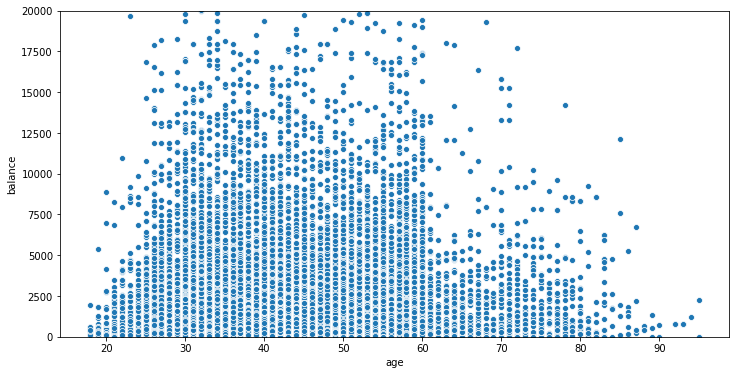

In [557]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))

sns.scatterplot(x="age", y="balance", data=df, ax = ax)
ax.set_ylim(0,20000)


plt.show()

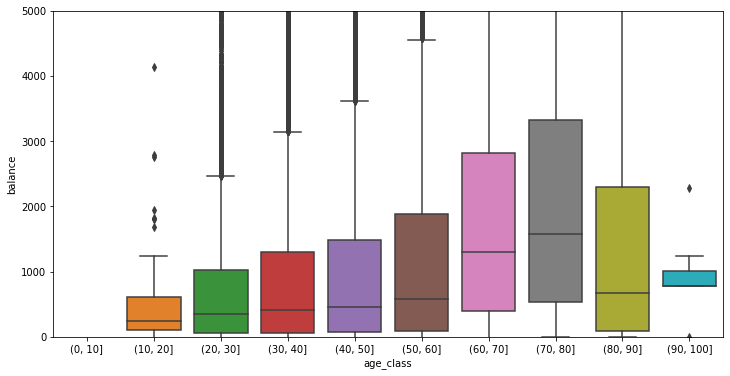

In [567]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))

sns.boxplot(x='age_class', y = "balance", data=df, ax = ax)
ax.set_ylim(0, 5000)

plt.show()

In [572]:
(df["balance"]/df["age"]).mean()

33.76528491095767

La corrélation ne semble pas évidente sur le scatterplot entre l'âge et le solde sur le compte en banque. Pour autant, chaque année en plus indique 30 euros en plus en moyenne sur son compte en banque. Cette corrélation est plus visible sur le graphe ci-dessus

##### Corrélation entre l'âge et la durée des appels

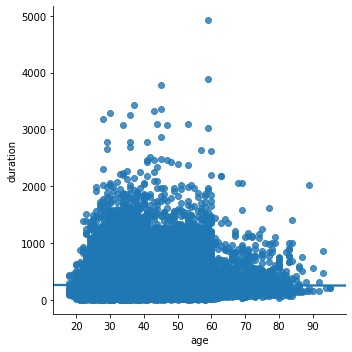

In [573]:
sns.lmplot(x="age", y="duration", data=df)

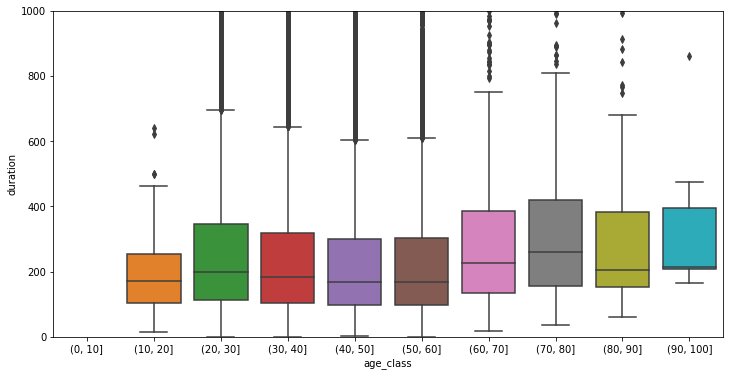

In [575]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))

sns.boxplot(x='age_class', y = "duration", data=df, ax = ax)
ax.set_ylim(0, 1000)

plt.show()

In [576]:
(df["duration"]/df["age"]).mean()

6.753213934417838

La corrélation entre l'âge et la durée des appels est bien moins nette puisque les 40-60 ans semble rester moins longtemps au téléphone que les autres classes d'âge 

#### 2.1.3 Autre relations entre variables explicatives

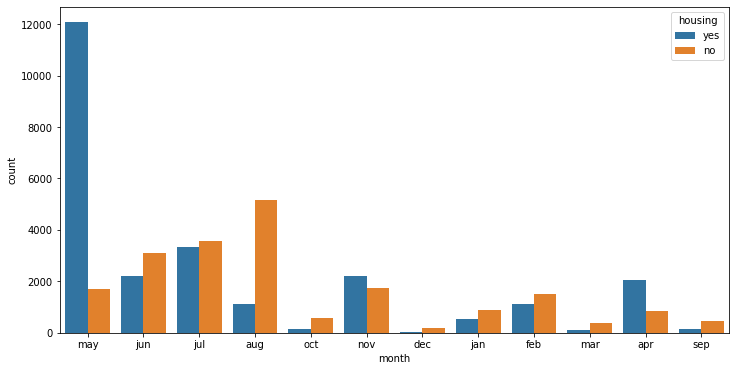

In [484]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))
sns.countplot(x = 'month', hue = 'housing', data = df)
plt.show()

### 2.1 Croisement des variables explicatives numériques avec la variable cible

In [229]:
var_bin = ["default", "housing", "loan", "y"]
var_cat = ["job","marital", "education", "contact", "month", "poutcome"]

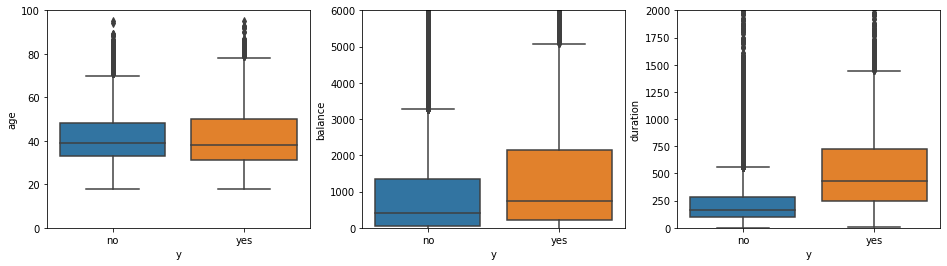

In [235]:
var_num = ["age", "balance", "duration"]
range_ylim = [100, 6000, 2000]
fig, axs = plt.subplots(1,3, figsize = (16, 4) )

for i in range(len(var_num)):
    sns.boxplot(x='y', y=var_num[i], data=df, ax = axs[i])
    axs[i].set_ylim(0, range_ylim[i])

In [432]:
#Création de déciles pour la variable balance
df["balance_dec"] = pd.qcut(df["balance"], 10)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_class,y_bin,balance_dec
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,"(50, 60]",0,"(1859.0, 3574.0]"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,"(40, 50]",0,"(22.0, 131.0]"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,"(30, 40]",0,"(0.0, 22.0]"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,"(40, 50]",0,"(1126.0, 1859.0]"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,"(30, 40]",0,"(0.0, 22.0]"


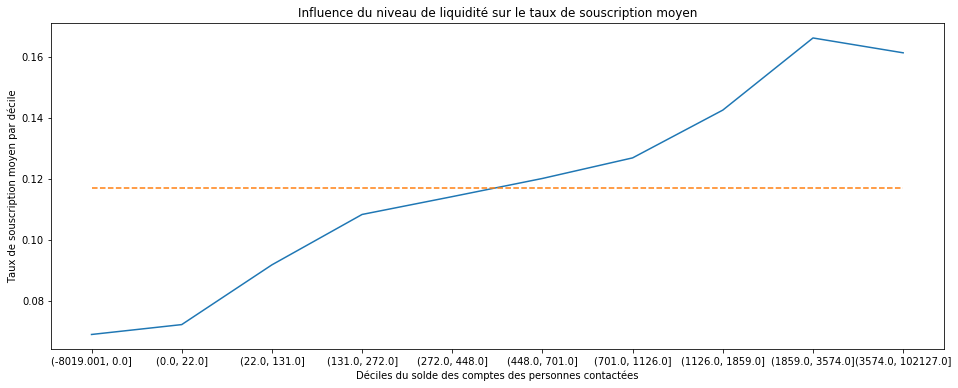

In [453]:
fig, ax = plt.subplots(1,1,figsize=(16,6))

ax.plot([str(i) for i in df.groupby("balance_dec")["y_bin"].describe().index], df.groupby("balance_dec")["y_bin"].describe()["mean"])
ax.plot([str(i) for i in df.groupby("balance_dec")["y_bin"].describe().index], [df["y_bin"].mean() for i in range(len(df.groupby("balance_dec")["y_bin"].describe()["mean"]))], '--')
ax.set_xlabel("Déciles du solde des comptes des personnes contactées")
ax.set_ylabel("Taux de souscription moyen par décile")
ax.set_title("Influence du niveau de liquidité sur le taux de souscription moyen")


plt.show()

### 2.2 Analyse des variables catégorielles

#### 2.2.1 Influence d'un facteur sur la variable cible

In [292]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_class', 'y_bin'],
      dtype='object')

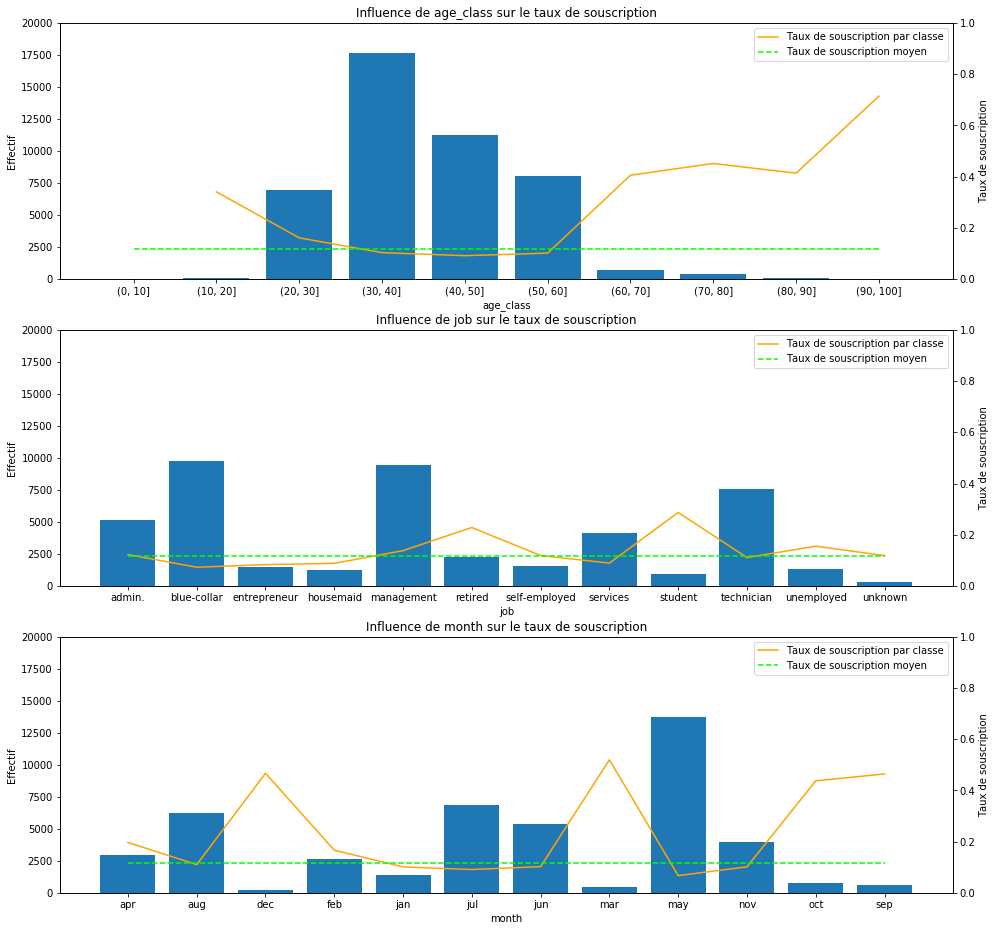

In [456]:
var_cat_mod = ["age_class", "job", "month"]
nb_mod = [10, 12, 12]

fig, axs = plt.subplots(len(var_cat_mod),1,figsize=(16,16))


for j in range(len(var_cat_mod)):
    
    axs[j].bar([str(i) for i in df.groupby(var_cat_mod[j])["y_bin"].describe().index], df.groupby(var_cat_mod[j])["y_bin"].describe()["count"])

    ax2 = axs[j].twinx()
    ax2.plot([str(i) for i in df.groupby(var_cat_mod[j])["y_bin"].describe().index], df.groupby(var_cat_mod[j])["y_bin"].describe()["mean"] ,
            label="Taux de souscription par classe",color="orange")
    ax2.plot([str(i) for i in df.groupby(var_cat_mod[j])["y_bin"].describe().index], [df.y.value_counts().apply(lambda x: x/len(df))["yes"] for i in range(nb_mod[j])] ,
            label="Taux de souscription moyen",color="lime", ls = '--')

    axs[j].set_xlabel(var_cat_mod[j])
    axs[j].set_ylabel("Effectif")
    axs[j].set_title("Influence de %s sur le taux de souscription" %var_cat_mod[j])
    axs[j].set_ylim(0,20000)

    ax2.set_ylabel("Taux de souscription")
    ax2.set_ylim(0,1)

    plt.legend(loc=0)
plt.show()

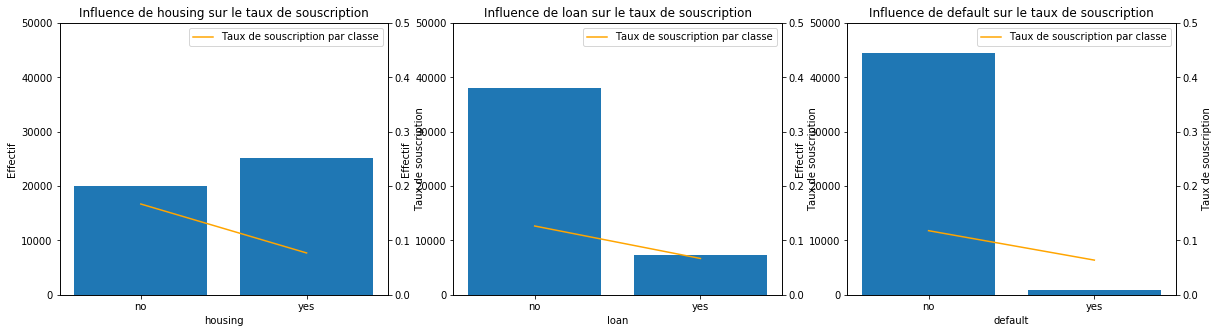

In [300]:
var_bin = ["housing", "loan", "default"]

fig, axs = plt.subplots(1,3, figsize=(20,5))


for j in range(len(var_cat_mod)):
    
    axs[j].bar([str(i) for i in df.groupby(var_bin[j])["y_bin"].describe().index], df.groupby(var_bin[j])["y_bin"].describe()["count"])

    ax2 = axs[j].twinx()
    ax2.plot([str(i) for i in df.groupby(var_bin[j])["y_bin"].describe().index], df.groupby(var_bin[j])["y_bin"].describe()["mean"] ,
            label="Taux de souscription par classe",color="orange")

    axs[j].set_xlabel(var_bin[j])
    axs[j].set_ylabel("Effectif")
    axs[j].set_title("Influence de %s sur le taux de souscription" %var_bin[j])
    axs[j].set_ylim(0,50000)

    ax2.set_ylabel("Taux de souscription")
    ax2.set_ylim(0,0.5)

    plt.legend(loc=0)
plt.show()

In [51]:
df.groupby("education")["y_bin"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
primary,6851.0,0.086265,0.280775,0.0,0.0,0.0,0.0,1.0
secondary,23202.0,0.105594,0.307324,0.0,0.0,0.0,0.0,1.0
tertiary,13301.0,0.150064,0.357147,0.0,0.0,0.0,0.0,1.0
unknown,1857.0,0.135703,0.342565,0.0,0.0,0.0,0.0,1.0


In [301]:
#Il reste encore les variables suivantes à croiser avec la variable cible: "education", "marital", "poutcome"

#### 2.2.2 Influence de deux facteurs sur la variable cible

In [505]:
pivot_sum = df.pivot_table(index=['job', 'month'], values=['y_bin'], aggfunc='sum').reset_index().pivot("month", "job", "y_bin")
pivot_sum

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
month,,,,,,,,,,,,
apr,68,77,9,10,153,49,23,28,34,100,20,6
aug,61,60,11,18,211,66,24,30,33,146,23,5
dec,12,5,1,2,25,21,2,8,7,11,6,0
feb,49,32,10,6,112,61,13,18,31,76,29,4
jan,20,11,2,2,21,24,5,13,8,22,11,3
jul,69,113,29,18,119,49,21,59,30,93,26,1
jun,73,89,13,14,135,36,23,46,18,78,20,1
mar,31,10,2,7,83,37,9,14,15,29,10,1
may,133,227,18,11,169,43,27,98,36,138,22,3


In [377]:
pivot_mean = df.pivot_table(index=['month','job'], values=['y_bin'], aggfunc='mean').reset_index().pivot("month", "job", "y_bin")
pivot_mean.head()


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
month,,,,,,,,,,,,
apr,0.168317,0.102258,0.128571,0.196078,0.276173,0.337931,0.267442,0.100000,0.382022,0.232019,0.322581,0.857143
aug,0.168975,0.098522,0.134146,0.068966,0.106673,0.168798,0.112676,0.112360,0.300000,0.080264,0.247312,0.079365
dec,0.521739,0.416667,0.333333,0.333333,0.490196,0.512195,0.333333,0.533333,0.411765,0.354839,0.750000,0.000000
feb,0.156051,0.079404,0.114943,0.117647,0.201802,0.363095,0.123810,0.085714,0.333333,0.178824,0.128889,0.307692
jan,0.112360,0.059459,0.052632,0.062500,0.072414,0.269663,0.094340,0.096296,0.205128,0.088353,0.110000,0.200000


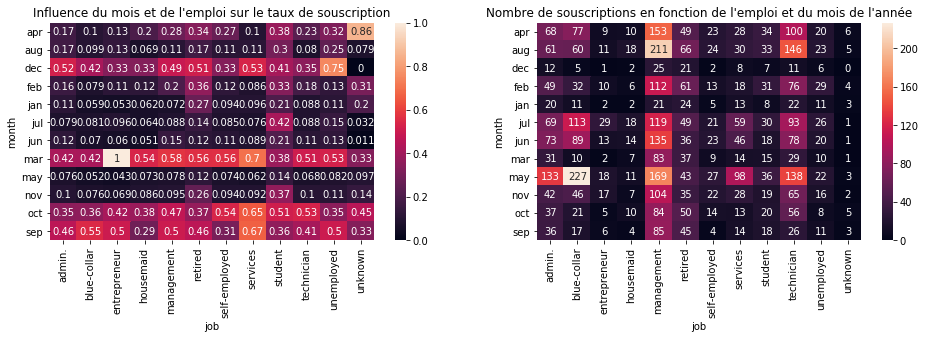

In [429]:
fig, axs = plt.subplots(1,2,figsize=(16,4))
ax1 = sns.heatmap(df.pivot_table(index=['month','job'], values=['y_bin'], aggfunc='mean').reset_index().pivot("month", "job", "y_bin"), ax = axs[0], annot=True)
ax1.set_title("Influence du mois et de l'emploi sur le taux de souscription")
ax2 = sns.heatmap(df.pivot_table(index=['month','job'], values=['y_bin'], aggfunc='sum').reset_index().pivot("month", "job", "y_bin"), ax = axs[1], annot=True, fmt="d")
ax2.set_title("Nombre de souscriptions en fonction de l'emploi et du mois de l'année")


plt.show()

On observe que les managers ont souscrit à l'offre plus de 200 fois en Aout mais le taux de souscription est seulement de 11% donc cela correspond seulement à un gros effort de vente (beaucoup de personnes contactées). A l'inverse, on observe 100% de souscription chez les entrepreneurs en mars mais cela concerne seulement 2 souscriptions donc ce n'est pas vraiment significatif. 

En revanche, 37 retraités ont souscrit à l'offre en Mars pour un taux de 56%, ce qui indique qu'il serait interessant d'augmenter l'effort de vente sur cette cible.